# Generate non-empty files of WGS dataset of raw, processed and summarised files for 200 patients with 1 sample each. 

## Import libraries

In [4]:
import os
import random
import math
import matplotlib.pyplot as plt

In [ ]:
num_samples = 200
base_path = "WGS"

# Create subfolders
raw_folder = os.path.join(base_path, "Raw")
processed_folder = os.path.join(base_path, "Processed")
summ_folder = os.path.join(base_path, "Summarised")

os.makedirs(raw_folder, exist_ok=True)
os.makedirs(processed_folder, exist_ok=True)
os.makedirs(summ_folder, exist_ok=True)

# Size categories
categories = ["KB", "1-9MB", "10-30MB"]
sample_counts = {c: 0 for c in categories}
sample_bytes = {c: 0 for c in categories}

def assign_category(index, total):
    """Return 'KB', '1-9MB', or '10-30MB' with 25%, 50%, 25% probability."""
    if index < total * 0.25:
        return "KB"
    elif index < total * 0.75:
        return "1-9MB"
    else:
        return "10-30MB"

def size_for_category(category):
    """Return a random size in bytes for the given category."""
    if category == "KB":
        return random.randint(10 * 1024, 900 * 1024)
    elif category == "1-9MB":
        return random.randint(1 * 1024 * 1024, 9 * 1024 * 1024)
    else:
        return random.randint(10 * 1024 * 1024, 30 * 1024 * 1024)

def write_binary_file(path, size_bytes, chunk_size=1024 * 1024):
    """
    Write a file with random bytes of approximately size_bytes.
    Uses chunks so memory usage stays reasonable.
    """
    remaining = size_bytes
    with open(path, "wb") as f:
        while remaining > 0:
            chunk = min(chunk_size, remaining)
            f.write(os.urandom(chunk))
            remaining -= chunk

# Generate data 
for i in range(num_samples):
    sample_id = f"ABC{i+1:03d}-CDI"

    category = assign_category(i, num_samples)
    size_bytes = size_for_category(category)

    sample_counts[category] += 1
    sample_bytes[category] += size_bytes

    files = [
        os.path.join(raw_folder, f"{sample_id}.fastq"),
        os.path.join(processed_folder, f"{sample_id}.bam"),
        os.path.join(summ_folder, f"{sample_id}.vcf"),
    ]

    for file_path in files:
        write_binary_file(file_path, size_bytes)


Total size by category:
KB: 22.68 MB across 50 samples
1-9MB: 506.93 MB across 100 samples
10-30MB: 1008.76 MB across 50 samples


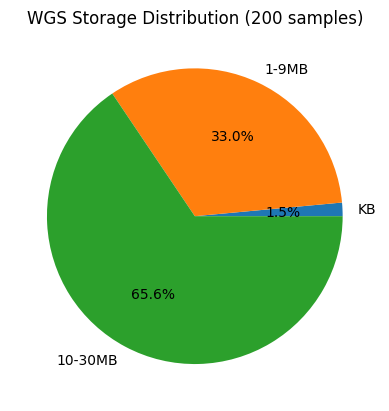

In [13]:
# Pie chart
sizes_mb = [sample_bytes[c] / (1024*1024) for c in categories]
print("Total size by category:")
for cat in categories:
    total_mb = sample_bytes[cat] / (1024 * 1024)
    count = sample_counts[cat]
    print(f"{cat}: {total_mb:.2f} MB across {count} samples")

plt.figure()
plt.pie(sizes_mb, labels=categories, autopct="%1.1f%%")
plt.title("WGS Storage Distribution (200 samples)")
plt.show()